In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset into python enviornment

In [2]:
df=pd.read_csv(r'/content/car_age_price.csv')

In [3]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Check the basic details about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
df.shape

(112, 2)

In [7]:
df.isna().sum()

Year     0
Price    0
dtype: int64

# Finding  the correlation matrix and display heatmap

In [8]:
corr_matrix=df.corr()

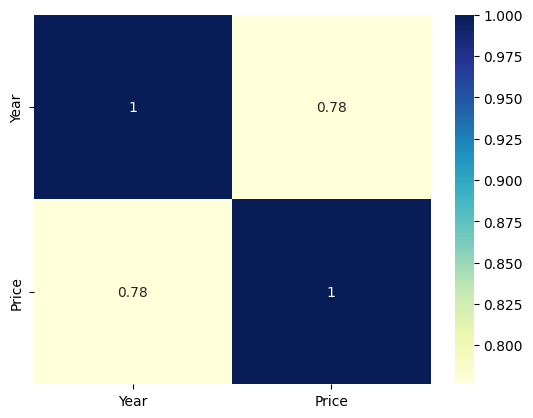

In [9]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

# Separating the features(year)and target variable(price)

*   List item
*   List item



In [10]:
x = df[['Year']]
y = df['Price']

In [11]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [12]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


# Split the dataset into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [16]:
y_train

66     525000
90     520000
62     540000
22     434999
85     320000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 89, dtype: int64

# Create and train the Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression,Lasso
lin_regressor=LinearRegression()
model=lin_regressor.fit(x_train,y_train)

# Create and train the Lasso Regression Model

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. 

In [18]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.1)

# Make predictions using the trained models 

In [19]:
predictions=model.predict(x_test)

In [20]:
year_2022 = [[2022]]

lin_regressor_pred = lin_regressor.predict(year_2022)
lasso_reg_pred = lasso_reg.predict(year_2022)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


# Evaluate the models using mean squared error

In [21]:
from sklearn.metrics import mean_squared_error,r2_score


In [22]:
lin_regressor_mse = mean_squared_error(y_test, lin_regressor.predict(x_test))
lasso_reg_mse = mean_squared_error(y_test, lasso_reg.predict(x_test))

# Print the predicted prices and MSE of both models

In [23]:
print("Linear Regression Prediction for 2022 Model: ", lin_regressor_pred[0])
print("Lasso Regression Prediction for 2022 Model: ", lasso_reg_pred[0])
print("Linear Regression MSE:", lin_regressor_mse)
print("Lasso Regression MSE:", lasso_reg_mse)


Linear Regression Prediction for 2022 Model:  743601.6159450412
Lasso Regression Prediction for 2022 Model:  743601.3917776793
Linear Regression MSE: 4326906256.829671
Lasso Regression MSE: 4326901608.19506


### Lower mean squared error indicates better performance. By comparing the mean squared errors, you can determine which model performs better in predicting the price of a second-hand Hyundai Grand i10.

### Lasso regression model perfoming better